In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def create_refrence_solution(chromosme_length):
    number_of_ones = int(chromosme_length / 2)
    refrence = np.zeros(chromosme_length)
    refrence[0 : number_of_ones] = 1
    np.random.shuffle(refrence)
    return refrence

In [38]:
def creat_starting_population(individuals,chromosme_length):
    poplulation = np.zeros((individuals,chromosme_length))
    for i in range(individuals):
        ones = np.random.randint(0,chromosme_length)
        poplulation[i,0:ones] = 1
        np.random.shuffle(poplulation)
        return poplulation

In [39]:
def calculate_fitness(refrence,population):
    identical_to_refrence = population == refrence
    fitness_score = identical_to_refrence.sum(axis=1)
    return fitness_score

In [40]:
def selct_individual_by_tournament(population,score):
    population_size = len(score)
    
    fightr_1 = np.random.randint(0,population_size-1)
    fightr_2 = np.random.randint(0,population_size-1)
    
    fighter_1 = score[fightr_1]
    fighter_2 = score[fightr_2]
    
    if fighter_1 >= fighter_2:
        winner = fightr_1
    else:
        winner = fightr_2
        
    return population[winner,:]

In [41]:
def breed_by_crossover(parent1,parent2):
    chromosome_length = len(parent1)
    crossover_point = np.random.randint(1,chromosome_length-1)
    child_1 = np.hstack((parent1[0:crossover_point],
                         parent2[crossover_point:]))
    
    child_2 = np.hstack((parent2[0:crossover_point],
                         parent1[crossover_point:]))
    
    
    return child_1,child_2
    
      

In [45]:
import numpy as np

def randomly_mutate_population(population, mutation_probability):
    # Ensure population is a numpy array
    population = np.array(population)
    
    # Generate an array of random numbers with the same shape as the population
    random_mutation_arry = np.random.random(size=population.shape)
    
    # Create a boolean array where True indicates the positions to mutate
    random_mutation_boolean = random_mutation_arry <= mutation_probability
    
    # Perform the mutation by flipping the bits at the selected positions
    population[random_mutation_boolean] = np.logical_not(population[random_mutation_boolean])
    
    return population


Stating best score , %target:  50.66666666666667
End best score %target: 100.0


Text(0, 0.5, 'Best sscore (% target)')

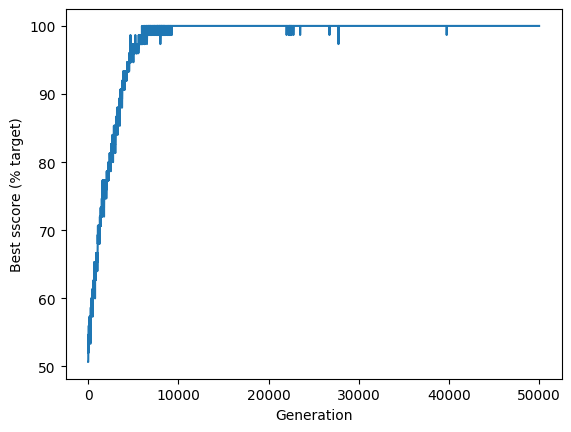

In [46]:
chromosome_length = 75
popluation_size = 500
maximum_generation = 200
best_score_progress = []

refrence = create_refrence_solution(chromosome_length)
popluation = creat_starting_population(popluation_size,chromosome_length)

score = calculate_fitness(refrence,popluation)
best_score = np.max(score)/chromosome_length*100
print('Stating best score , %target: ' ,best_score )


best_score_progress.append(best_score)

for generation in range(maximum_generation):
    new_population = []
    
    
    for i in range(int(popluation_size/2)):
        parent_1 = selct_individual_by_tournament(popluation,score)
        parent_2 = selct_individual_by_tournament(popluation,score)
        child_1,child_2 = breed_by_crossover(parent_1,parent_2)
        new_population.append(child_1)
        new_population.append(child_2)
        popluation = np.array(new_population)
        mutation_rate = 0.002 
        popluation = randomly_mutate_population(popluation,mutation_rate)
        score = calculate_fitness(refrence,popluation)
        best_score = np.max(score)/chromosome_length*100
        best_score_progress.append(best_score)
        
print('End best score %target:',best_score)
plt.plot(best_score_progress)
plt.xlabel('Generation')
plt.ylabel('Best sscore (% target)') 

